# Import des modules

In [33]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Préparation des données

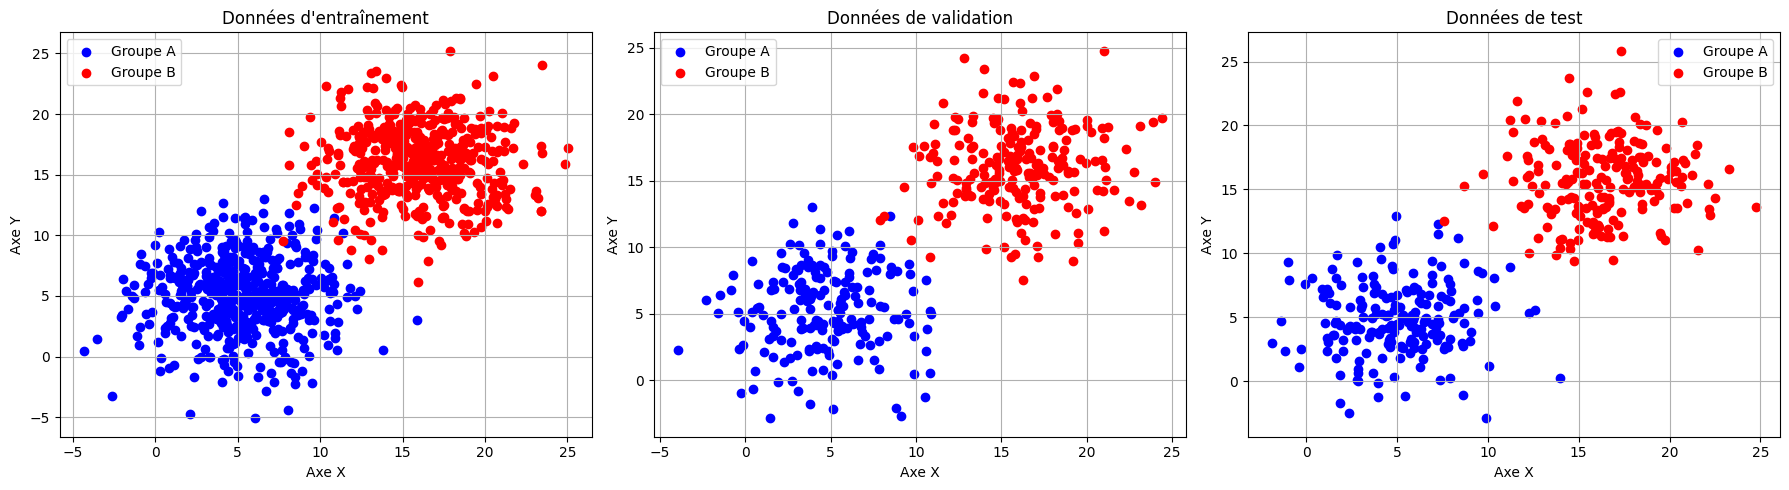

In [34]:
def scatter_plot(ax, X, Y, title):
        group_a = X[Y == 1]
        group_b = X[Y == 0]
        ax.scatter(group_a[:, 0], group_a[:, 1], color='blue', label='Groupe A')
        ax.scatter(group_b[:, 0], group_b[:, 1], color='red', label='Groupe B')
        ax.set_title(title)
        ax.set_xlabel("Axe X")
        ax.set_ylabel("Axe Y")
        ax.legend()
        ax.grid(True)

def plot_datasets_subplots(X_train, Y_train, X_val, Y_val, X_test, Y_test):
    """
    Affiche les ensembles d'entraînement, de validation et de test dans des sous-graphes.
    Chaque point est coloré selon son groupe : bleu pour le groupe A, rouge pour le groupe B.
    """
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    scatter_plot(axs[0], X_train, Y_train, "Données d'entraînement")
    scatter_plot(axs[1], X_val, Y_val, "Données de validation")
    scatter_plot(axs[2], X_test, Y_test, "Données de test")

    plt.tight_layout()
    plt.show()

# ==== Paramètres ====
N_train = 500  # Nombre d'échantillons par classe pour l'entraînement
N_val = 200    # Pour validation
N_test = 200   # Pour test
mean_a, mean_b = 5, 16  # Moyennes pour les deux groupes

# ==== Génération des données ====
# Chaque groupe aura (N_train + N_val + N_test) points = 900 points par groupe
total_per_class = N_train + N_val + N_test

# Génération de données gaussiennes pour les deux groupes
group_a = [[rd.gauss(mean_a, 3), rd.gauss(mean_a, 3)] for _ in range(total_per_class)]
group_b = [[rd.gauss(mean_b, 3), rd.gauss(mean_b, 3)] for _ in range(total_per_class)]

# Création des tableaux X (features) et Y (labels)
X_raw_data = np.array(group_a + group_b)
Y_raw_data = np.array([1] * total_per_class + [0] * total_per_class)  # 1 = groupe A, 0 = groupe B

# Mélange des données
indices = np.arange(len(X_raw_data))
np.random.shuffle(indices)
X_raw_data = X_raw_data[indices]
Y_raw_data = Y_raw_data[indices]

# ==== Découpage en ensembles ====
train_size = 2 * N_train
val_size = 2 * N_val
test_size = 2 * N_test

X_train = X_raw_data[:train_size]
Y_train = Y_raw_data[:train_size]

X_val = X_raw_data[train_size:train_size + val_size]
Y_val = Y_raw_data[train_size:train_size + val_size]

X_test = X_raw_data[train_size + val_size:]
Y_test = Y_raw_data[train_size + val_size:]

# ==== Visualisation ====
plot_datasets_subplots(X_train, Y_train, X_val, Y_val, X_test, Y_test)

# ==== Normalisation (Min-Max scaling) ====
min_val = np.min(X_raw_data)
max_val = np.max(X_raw_data)

X_train = (X_train - min_val) / (max_val - min_val)
X_val = (X_val - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)




# Un seul neurone

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4883 - loss: 0.6421  
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4727 - loss: 0.6373 
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5086 - loss: 0.6152 
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4796 - loss: 0.6201 
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5323 - loss: 0.6024 
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5576 - loss: 0.6007 
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6084 - loss: 0.5970 
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6824 - loss: 0.5908 
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7528 - loss: 0.5835 
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.5802 
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8286 - loss: 0.5852 
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

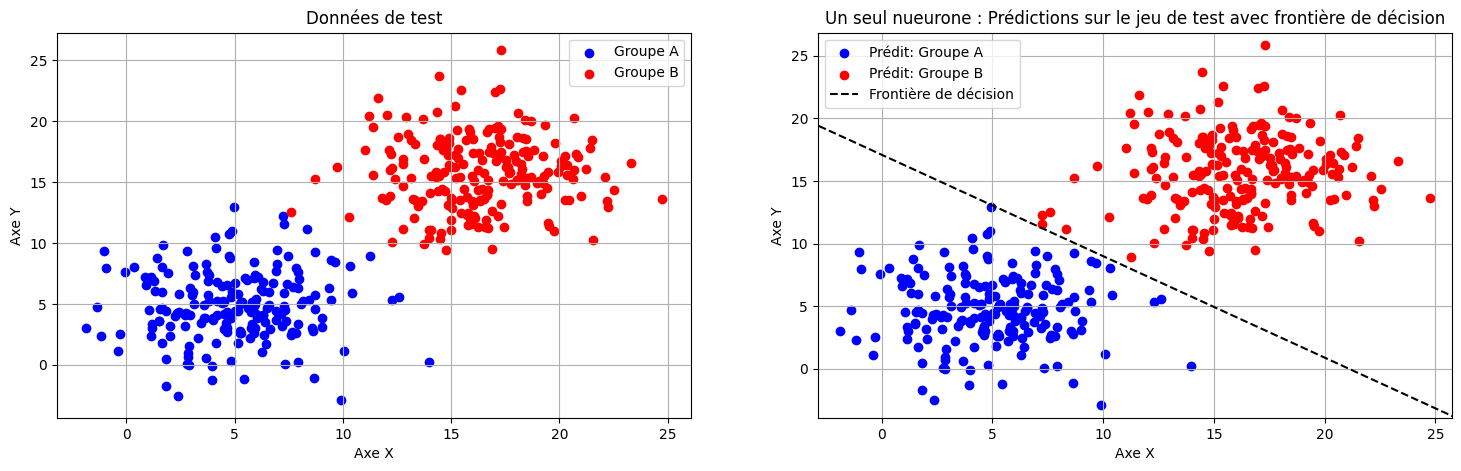

<Figure size 600x600 with 0 Axes>

In [35]:
# === Partie A - Définition du modèle ===
modele_1 = Sequential()

p = 1  # Nombre de neurones dans la première couche (perceptron simple)

# Couche d'entrée avec 2 entrées (X et Y) et p neurones avec activation sigmoïde
modele_1.add(Dense(p, input_dim=2, activation="sigmoid"))

# Compilation du modèle avec la descente de gradient stochastique (SGD)
modele_1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Affichage de la structure du modèle
print(modele_1.summary())

# === Partie B - Entraînement du modèle ===
modele_1.fit(X_train, Y_train, batch_size=20, epochs=50)

# === Partie C - Évaluation sur les données de validation ===
resultat_1 = modele_1.evaluate(X_val, Y_val, verbose=0)
print("Erreur (loss) sur les données de validation :", resultat_1[0])
print("Précision (accuracy) sur les données de validation :", resultat_1[1])

# === Partie D - Prédictions ===
# Prédiction des probabilités sur le jeu de test
Y_predict_proba = modele_1.predict(X_test)

# Conversion en classes binaires selon un seuil de 0.5
Y_predict = [1 if y[0] >= 0.5 else 0 for y in Y_predict_proba]

# Dénormalisation de X_test pour un affichage compréhensible
X_test_denorm = X_test * (max_val - min_val) + min_val

# Séparation des points prédits par classe pour affichage
blue = []
red = []
for i in range(len(X_test_denorm)):
    if Y_predict[i] == 1:
        blue.append((X_test_denorm[i][0], X_test_denorm[i][1]))
    else:
        red.append((X_test_denorm[i][0], X_test_denorm[i][1]))

blue_1 = np.array(blue)
red_1 = np.array(red)

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Tracé des prédictions
plt.figure(figsize=(6, 6))
if len(blue) > 0:
    axs[1].scatter(blue_1[:, 0], blue_1[:, 1], color='blue', label='Prédit: Groupe A')
if len(red) > 0:
    axs[1].scatter(red_1[:, 0], red_1[:, 1], color='red', label='Prédit: Groupe B')

# === Partie E - Tracé de la frontière de décision ===
# Récupération des poids du modèle
weights = modele_1.get_weights()
w1, w2 = weights[0][0][0], weights[0][1][0]  # poids des deux entrées
b = weights[1][0]  # biais

# Calcul dans l'espace normalisé : w1 * x + w2 * y + b = 0 => y = -(w1/w2)x - b/w2
x_vals_norm = np.linspace(0, 1, 100)
y_vals_norm = -(w1 / w2) * x_vals_norm - b / w2

# Dénormalisation des coordonnées pour affichage
x_vals = x_vals_norm * (max_val - min_val) + min_val
y_vals = y_vals_norm * (max_val - min_val) + min_val

# Définir les limites du graphe en fonction des données
x_min, x_max = np.min(X_test_denorm[:, 0]), np.max(X_test_denorm[:, 0])
y_min, y_max = np.min(X_test_denorm[:, 1]), np.max(X_test_denorm[:, 1])
axs[1].set_xlim(x_min - 1, x_max + 1)
axs[1].set_ylim(y_min - 1, y_max + 1)

# Tracer la frontière de décision
axs[1].plot(x_vals, y_vals, color="black", linestyle="--", label="Frontière de décision")

axs[1].set_title("Un seul nueurone : Prédictions sur le jeu de test avec frontière de décision")
axs[1].set_xlabel("Axe X")
axs[1].set_ylabel("Axe Y")
axs[1].legend()
axs[1].grid(True)
scatter_plot(axs[0], X_test_denorm, Y_test, "Données de test")
plt.show()

# Deux Neurones

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 2)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5280 - loss: 1.0278  
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4989 - loss: 0.9412 
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4552 - loss: 0.8570 
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2712 - loss: 0.8250 
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1415 - loss: 0.7932
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0713 - loss: 0.7783
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1171 - loss: 0.7617
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1984 - loss: 0.7495
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2916 - loss: 0.7383
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4220 - loss: 0.7233
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4482 - loss: 0.7152 
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 

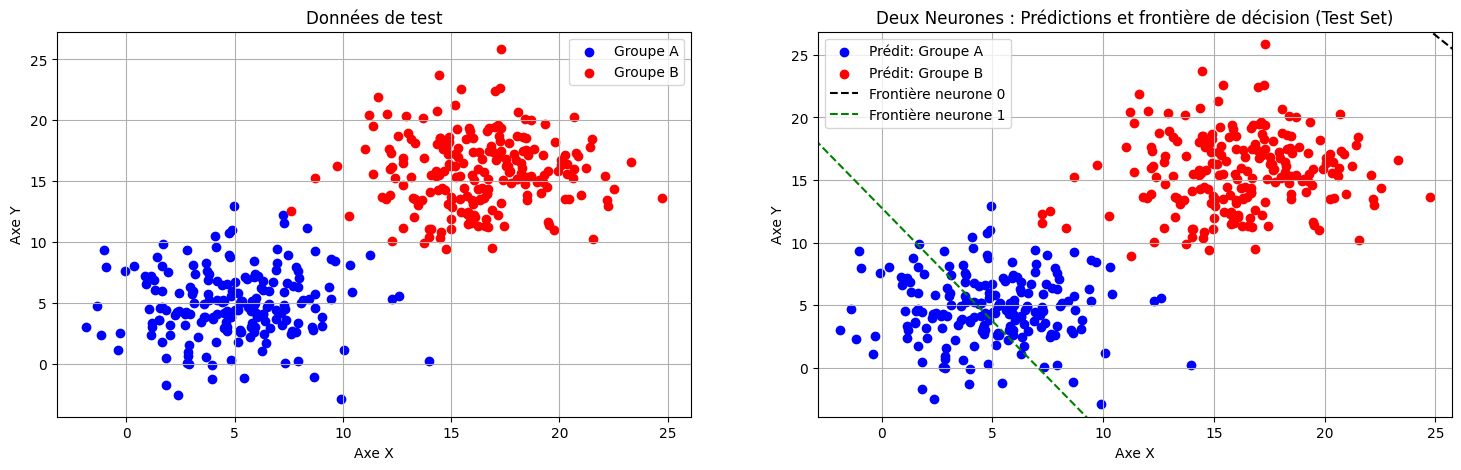

<Figure size 600x600 with 0 Axes>

In [36]:
# === Partie A - Préparation des données pour softmax (2 neurones en sortie) ===
Y_train_2 = to_categorical(Y_train, num_classes=2)
Y_val_2 = to_categorical(Y_val, num_classes=2)

# === Partie B - Définition du modèle ===
modele_2 = Sequential()

p = 2  # Nombre de neurones en sortie (softmax pour classification binaire one-hot)
modele_2.add(Dense(p, input_dim=2, activation="softmax"))  # Softmax préférable ici

# Compilation : cross-entropy pour multi-sortie + SGD
modele_2.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
print(modele_2.summary())

# === Partie C - Entraînement ===
modele_2.fit(X_train, Y_train_2, batch_size=20, epochs=50)

# === Partie D - Évaluation sur les données de validation ===
resultat = modele_2.evaluate(X_val, Y_val_2, verbose=0)
print("Erreur (loss) sur les données de validation :", resultat[0])
print("Précision (accuracy) sur les données de validation :", resultat[1])

# === Partie E - Prédictions ===
Y_predict_proba = modele_2.predict(X_test)

# Prédiction : choisir la classe avec la probabilité la plus élevée
Y_predict = np.argmax(Y_predict_proba, axis=1)

# Dénormalisation des features
X_test_denorm = X_test * (max_val - min_val) + min_val

# Séparation des points selon la prédiction
blue = X_test_denorm[Y_predict == 1]
red = X_test_denorm[Y_predict == 0]

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Tracé des prédictions
plt.figure(figsize=(6, 6))
if len(blue) > 0:
    axs[1].scatter(blue_1[:, 0], blue_1[:, 1], color='blue', label='Prédit: Groupe A')
if len(red) > 0:
    axs[1].scatter(red_1[:, 0], red_1[:, 1], color='red', label='Prédit: Groupe B')

# === Tracé des frontières de décision (par neurone) ===
weights = modele_2.get_weights()

# Extraction des poids et biais pour les deux neurones
w11, w12 = weights[0][0][0], weights[0][1][0]
w21, w22 = weights[0][0][1], weights[0][1][1]
b1, b2 = weights[1][0], weights[1][1]

x_vals_norm = np.linspace(0, 1, 100)

# Frontières de décision (chaque neurone séparément)
y_vals_norm_1 = -(w11 / w12) * x_vals_norm - b1 / w12
y_vals_norm_2 = -(w21 / w22) * x_vals_norm - b2 / w22

# Dénormalisation
x_vals = x_vals_norm * (max_val - min_val) + min_val
y_vals_1 = y_vals_norm_1 * (max_val - min_val) + min_val
y_vals_2 = y_vals_norm_2 * (max_val - min_val) + min_val

# Limites du graphe
x_min, x_max = np.min(X_test_denorm[:, 0]), np.max(X_test_denorm[:, 0])
y_min, y_max = np.min(X_test_denorm[:, 1]), np.max(X_test_denorm[:, 1])
axs[1].set_xlim(x_min - 1, x_max + 1)
axs[1].set_ylim(y_min - 1, y_max + 1)

# Tracé des frontières
axs[1].plot(x_vals, y_vals_1, color="black", linestyle="--", label="Frontière neurone 0")
axs[1].plot(x_vals, y_vals_2, color="green", linestyle="--", label="Frontière neurone 1")

axs[1].set_title("Deux Neurones : Prédictions et frontière de décision (Test Set)")
axs[1].set_xlabel("Axe X")
axs[1].set_ylabel("Axe Y")
axs[1].legend()
axs[1].grid(True)
scatter_plot(axs[0], X_test_denorm, Y_test, "Données de test")
plt.show()


# Trois Neurones

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4457 - loss: 0.8286
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4669 - loss: 0.7871
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4684 - loss: 0.7662
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4784 - loss: 0.7481
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4496 - loss: 0.7486
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4735 - loss: 0.7344
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5124 - loss: 0.7212
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4973 - loss: 0.7220
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4673 - loss: 0.7220
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4434 - loss: 0.7173
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1186 - loss: 0.7172
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0179

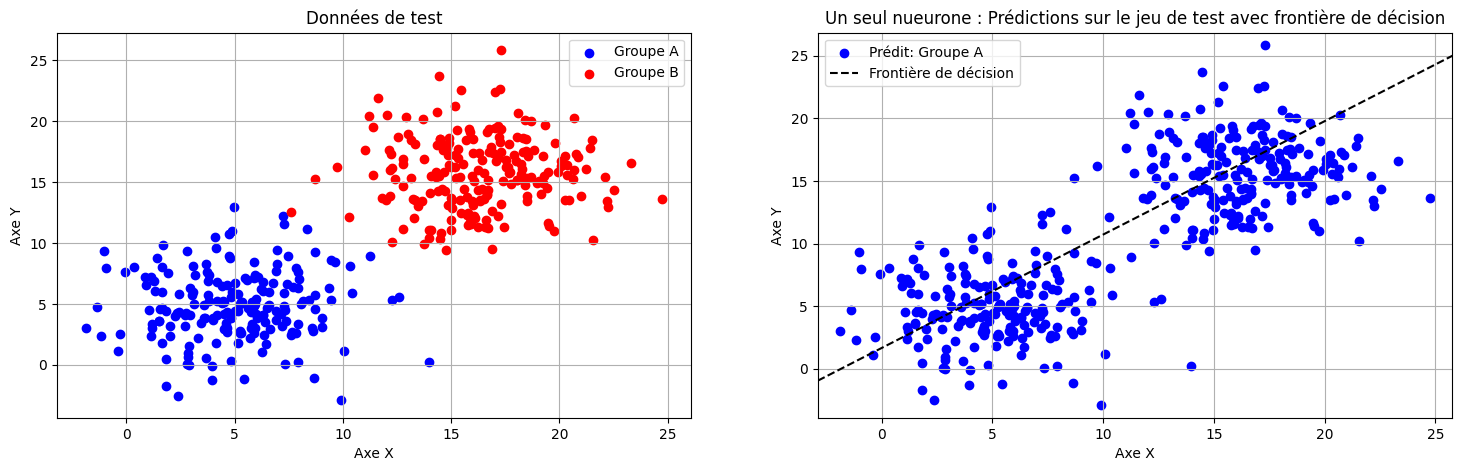

<Figure size 600x600 with 0 Axes>

In [38]:
# === Partie A - Définition du modèle ===
modele_1 = Sequential()

p = 2  # Nombre de neurones dans la première couche (perceptron simple)

# Couche d'entrée avec 2 entrées (X et Y) et p neurones avec activation sigmoïde
modele_1.add(Dense(p, input_dim=2, activation="sigmoid"))
modele_1.add(Dense(1, activation="sigmoid"))

# Compilation du modèle avec la descente de gradient stochastique (SGD)
modele_1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Affichage de la structure du modèle
print(modele_1.summary())

# === Partie B - Entraînement du modèle ===
modele_1.fit(X_train, Y_train, batch_size=20, epochs=50)

# === Partie C - Évaluation sur les données de validation ===
resultat_1 = modele_1.evaluate(X_val, Y_val, verbose=0)
print("Erreur (loss) sur les données de validation :", resultat_1[0])
print("Précision (accuracy) sur les données de validation :", resultat_1[1])

# === Partie D - Prédictions ===
# Prédiction des probabilités sur le jeu de test
Y_predict_proba = modele_1.predict(X_test)

# Conversion en classes binaires selon un seuil de 0.5
Y_predict = [1 if y[0] >= 0.5 else 0 for y in Y_predict_proba]

# Dénormalisation de X_test pour un affichage compréhensible
X_test_denorm = X_test * (max_val - min_val) + min_val

# Séparation des points prédits par classe pour affichage
blue = []
red = []
for i in range(len(X_test_denorm)):
    if Y_predict[i] == 1:
        blue.append((X_test_denorm[i][0], X_test_denorm[i][1]))
    else:
        red.append((X_test_denorm[i][0], X_test_denorm[i][1]))

blue_1 = np.array(blue)
red_1 = np.array(red)

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

# Tracé des prédictions
plt.figure(figsize=(6, 6))
if len(blue) > 0:
    axs[1].scatter(blue_1[:, 0], blue_1[:, 1], color='blue', label='Prédit: Groupe A')
if len(red) > 0:
    axs[1].scatter(red_1[:, 0], red_1[:, 1], color='red', label='Prédit: Groupe B')

# === Partie E - Tracé de la frontière de décision ===
# Récupération des poids du modèle
weights = modele_1.get_weights()
w1, w2 = weights[0][0][0], weights[0][1][0]  # poids des deux entrées
b = weights[1][0]  # biais

# Calcul dans l'espace normalisé : w1 * x + w2 * y + b = 0 => y = -(w1/w2)x - b/w2
x_vals_norm = np.linspace(0, 1, 100)
y_vals_norm = -(w1 / w2) * x_vals_norm - b / w2

# Dénormalisation des coordonnées pour affichage
x_vals = x_vals_norm * (max_val - min_val) + min_val
y_vals = y_vals_norm * (max_val - min_val) + min_val

# Définir les limites du graphe en fonction des données
x_min, x_max = np.min(X_test_denorm[:, 0]), np.max(X_test_denorm[:, 0])
y_min, y_max = np.min(X_test_denorm[:, 1]), np.max(X_test_denorm[:, 1])
axs[1].set_xlim(x_min - 1, x_max + 1)
axs[1].set_ylim(y_min - 1, y_max + 1)

# Tracer la frontière de décision
axs[1].plot(x_vals, y_vals, color="black", linestyle="--", label="Frontière de décision")

axs[1].set_title("Un seul nueurone : Prédictions sur le jeu de test avec frontière de décision")
axs[1].set_xlabel("Axe X")
axs[1].set_ylabel("Axe Y")
axs[1].legend()
axs[1].grid(True)
scatter_plot(axs[0], X_test_denorm, Y_test, "Données de test")
plt.show()